In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pint_pandas

units = pint_pandas.PintType.ureg
units.setup_matplotlib()

In [11]:
w = channel_width = 5.5 * units.cm
g = 9.81 * units.m / units.s**2
water_density = 997 * units.kg / units.m**3

In [12]:
wed_data = pd.read_csv('./lab3_wed_data.csv', header=[0,1])
wed_data = wed_data.pint.quantify(level=-1) # Retrieve units using pint

In [13]:
wed_data['Q'] = wed_data['V'] / wed_data['t']
wed_data['U_avg_1'] = (wed_data['Q'] / (wed_data['h_1'] * channel_width)).pint.to_reduced_units()
# data['U_avg_2'] = (data['Q'] / (data['h_2'] * channel_width)).pint.to_reduced_units()
wed_data['froude_1'] = (wed_data['U_avg_1'] / np.sqrt(g * wed_data['h_1'])).pint.to_reduced_units()
# data['froude_2'] = (data['U_avg_2'] / np.sqrt(g * data['h_2'])).pint.to_reduced_units()

In [14]:
wed_data

,V,t,h_1,h_2,Q,U_avg_1,froude_1
0,500,3.8,6,16,131.57894736842107,39.872408293460936,1.6434721120065727
1,400,2.2,8,20,181.8181818181818,41.32231404958678,1.4750445484783725
2,450,2.0,8,25,225.0,51.13636363636364,1.8253676287419858
3,450,3.5,5,17,128.57142857142858,46.75324675324677,2.1110196201930287
4,460,5.4,3,14,85.18518518518518,51.6273849607183,3.0094352012722387
5,500,1.9,7,24,263.15789473684214,68.35269993164732,2.6083877395051385
6,510,2.1,9,26,242.85714285714283,49.06204906204906,1.651162908106703
7,480,2.3,7,20,208.69565217391306,54.20666290231509,2.068564885590162
8,460,2.7,6,19,170.37037037037035,51.6273849607183,2.1279920383611026
9,440,9.1,2,7,48.35164835164835,43.956043956043956,3.1381167536858556


In [15]:
wed_data.dtypes

V                    pint[milliliter]
t                        pint[second]
h_1                  pint[millimeter]
h_2                  pint[millimeter]
Q           pint[milliliter / second]
U_avg_1     pint[centimeter / second]
froude_1          pint[dimensionless]
dtype: object

In [16]:
def height_ratio(froude):
    """Computes the ratio of the depths of water before and after hydraulic jump for the given Froude Number"""
    return 0.5 * (np.sqrt(1 + 8 * froude**2) - 1)

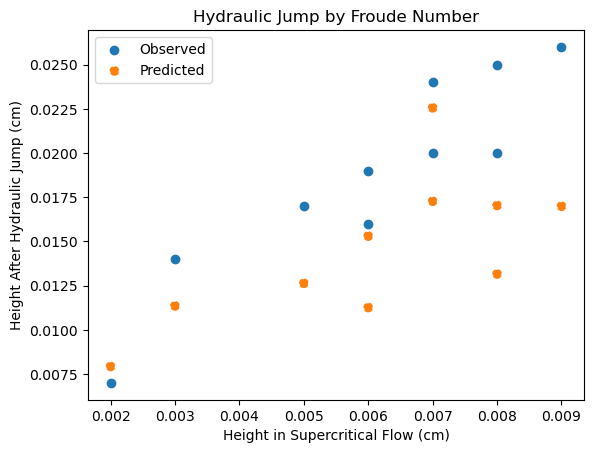

In [19]:
ax = plt.gca()

ax.scatter(wed_data['h_1'].pint.to('m'), wed_data['h_2'].pint.to('m'), label='Observed')

ax.scatter(wed_data['h_1'].pint.to('m'), height_ratio(wed_data['froude_1']) * wed_data['h_1'].pint.to('m'), linestyle='--', color='tab:orange', label='Predicted')

ax.set_title('Hydraulic Jump by Froude Number')
ax.set_xlabel('Height in Supercritical Flow (m)')
ax.set_ylabel('Height After Hydraulic Jump (m)')
ax.legend()

plt.show()